In [97]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from openbb_terminal.sdk import openbb
import yfinance as yf

In [98]:
pd.options.display.float_format = '{:.4%}'.format
# Date range
start_date = pd.to_datetime('2020-11-01')
end_date = pd.to_datetime('2023-11-01')

In [106]:
SP=(pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0])
assets=SP.Symbol.tolist()
print(assets)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CDAY', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CV

In [107]:
assets=['AAPL','ABBV','AMZN','AIG','BAC','C','CSCO','MSCI','DIS','EBAY','F','GE','GM','GS','HD','HPQ','IBM','INTC','JNJ','JPM'] 
assets.sort()

In [108]:
# Tickers of factors
factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()
tickers=assets+factors

In [109]:
data = openbb.stocks.ca.hist(
    tickers,
    start_date=start_date,
    end_date=end_date
)


In [110]:
print(data.head())

                  AAPL       ABBV        AIG        AMZN        BAC  \
Date                                                                  
2020-11-02 10669.8280% 7790.5701% 3012.3543% 15022.3999% 2225.1764%   
2020-11-03 10833.6472% 7764.9681% 3053.2003% 15242.0502% 2281.5451%   
2020-11-04 11276.0559% 8342.3103% 2932.5205% 16205.7999% 2188.2133%   
2020-11-05 11676.2856% 8270.8046% 3103.3285% 16610.0006% 2274.1524%   
2020-11-06 11663.0196% 8196.6499% 3078.2646% 16556.8497% 2246.4302%   

                    C       CSCO         DIS       EBAY         F  ...  \
Date                                                               ...   
2020-11-02 3763.7905% 3281.0127% 11973.9754% 4526.1574% 672.3225%  ...   
2020-11-03 3881.4930% 3352.3006% 12361.7119% 4625.4356% 687.1468%  ...   
2020-11-04 3752.1992% 3342.2470% 12466.3712% 4521.4294% 666.2185%  ...   
2020-11-05 3840.4755% 3402.5661% 12654.7569% 4671.7655% 696.7389%  ...   
2020-11-06 3808.3752% 3429.9843% 12704.5944% 4792.7917% 67

In [111]:
X = data[factors].pct_change().dropna()
Y = data[assets].pct_change().dropna()

display(X.head())

,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2020-11-03,1.8054%,1.8765%,2.1922%,1.6787%,1.9476%
2020-11-04,4.4921%,2.4271%,0.5748%,1.1006%,0.1186%
2020-11-05,1.8424%,1.7233%,2.2247%,0.8554%,2.4477%
2020-11-06,-0.0194%,-0.1749%,-0.2097%,0.3392%,-0.6936%
2020-11-09,-2.8990%,2.3520%,2.7611%,1.6290%,3.6347%


In [112]:
#This part is just to visualize how Riskfolio-Lib calculates a loadings matrix.
import riskfolio as rp

step = 'Forward' # Could be Forward or Backward stepwise regression
loadings = rp.loadings_matrix(X=X, Y=Y, stepwise=step)

loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')

,const,MTUM,QUAL,SIZE,USMV,VLUE
AAPL,0.0003,0.3106,1.6233,-0.5948,0.0000,-0.2118
ABBV,0.0007,0.0000,-0.2817,-0.7887,1.2900,0.6111
AIG,0.0008,0.0000,-0.9976,0.6065,0.0000,1.5457
AMZN,-0.0004,0.0000,2.2083,0.8273,-1.0682,-1.0779
BAC,-0.0000,-0.1217,-0.5940,0.7012,-0.3394,1.3537
C,-0.0002,-0.1432,-0.4528,0.6836,-0.6274,1.4467
CSCO,0.0003,0.0000,0.6116,-1.0371,0.7333,0.8010
DIS,-0.0008,-0.2833,0.4554,1.0045,-0.4793,0.2603
EBAY,-0.0004,0.0000,0.0000,1.0890,0.0000,0.0000
F,0.0003,0.0000,0.0000,0.4167,-1.0522,1.8599


In [115]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0)

port.factors = X
port.factors_stats(method_mu=method_mu, method_cov=method_cov, d=0)

# Estimate optimal portfolio:

port.alpha = 0.02
model='FM' # Factor Model
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios
rf = 0.04 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,ABBV,AIG,AMZN,BAC,C,CSCO,DIS,EBAY,F,GE,GM,GS,HD,HPQ,IBM,INTC,JNJ,JPM,MSCI
weights,0.0000%,19.0469%,0.0000%,2.3103%,0.0000%,1.8093%,0.8014%,0.7969%,0.8126%,0.0000%,0.7425%,0.0000%,4.0722%,4.7753%,0.0000%,14.5537%,0.0000%,46.5267%,2.7052%,1.0470%


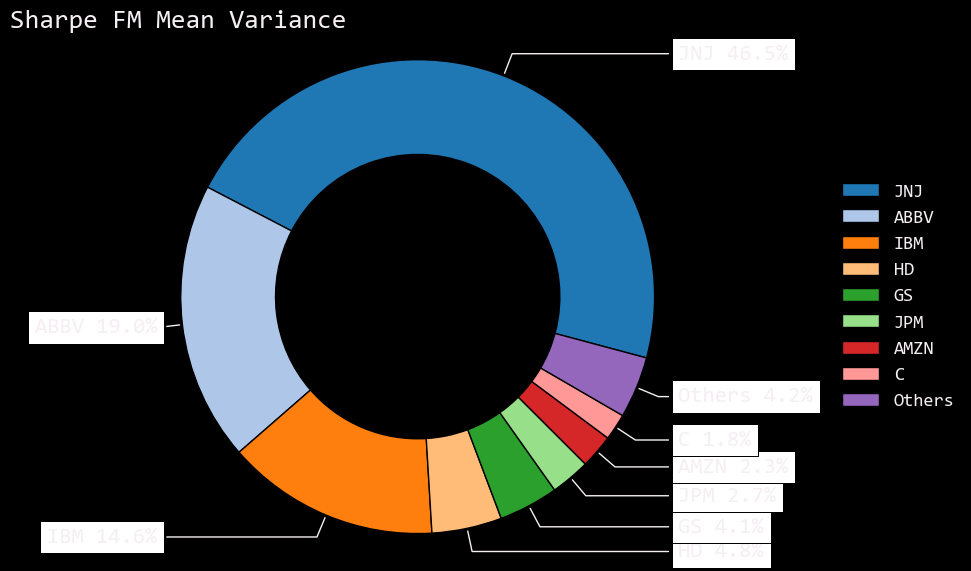

In [116]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                height=6, width=10, ax=None)

In [117]:
#calculate efficient frontier
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,ABBV,AIG,AMZN,BAC,C,CSCO,DIS,EBAY,F,GE,GM,GS,HD,HPQ,IBM,INTC,JNJ,JPM,MSCI
0,0.0000%,19.0469%,0.0000%,2.3103%,0.0000%,1.8093%,0.8014%,0.7969%,0.8126%,0.0000%,0.7425%,0.0000%,4.0722%,4.7753%,0.0000%,14.5537%,0.0000%,46.5267%,2.7052%,1.0470%
1,3.7201%,25.9562%,1.5303%,0.0000%,0.0000%,0.0000%,2.8795%,0.0000%,0.0000%,0.0000%,7.1828%,0.0000%,6.0203%,0.0000%,0.0000%,15.4394%,0.0000%,35.1252%,0.7124%,1.4338%
2,4.7599%,29.2394%,3.1916%,0.0000%,0.0000%,0.0000%,3.0772%,0.0000%,0.0000%,0.0000%,9.6816%,0.0000%,5.6642%,0.0000%,0.0000%,15.1437%,0.0000%,28.7242%,0.0000%,0.5183%
3,5.4267%,31.7505%,4.3717%,0.0000%,0.0000%,0.0000%,3.1356%,0.0000%,0.0000%,0.0000%,11.5361%,0.0000%,5.2409%,0.0000%,0.0000%,14.8472%,0.0000%,23.6913%,0.0000%,0.0000%
4,5.7551%,33.9076%,5.3769%,0.0000%,0.0000%,0.0000%,3.1231%,0.0000%,0.0000%,0.0000%,13.0989%,0.0000%,4.8055%,0.0000%,0.0000%,14.6226%,0.0000%,19.3105%,0.0000%,0.0000%


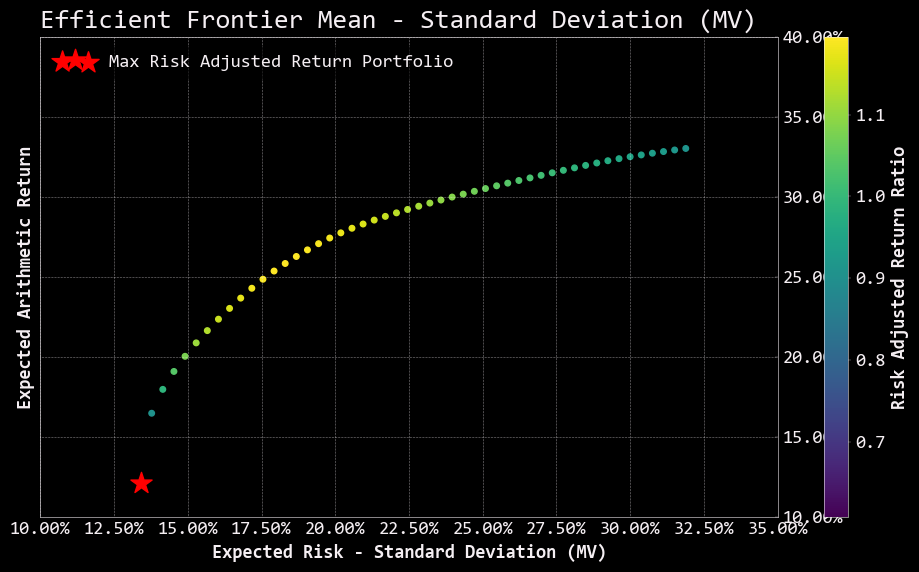

In [118]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_fm # Expected returns
cov = port.cov_fm # Covariance matrix
returns = port.returns_fm # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                    rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                    marker='*', s=16, c='r', height=6, width=10, ax=None)

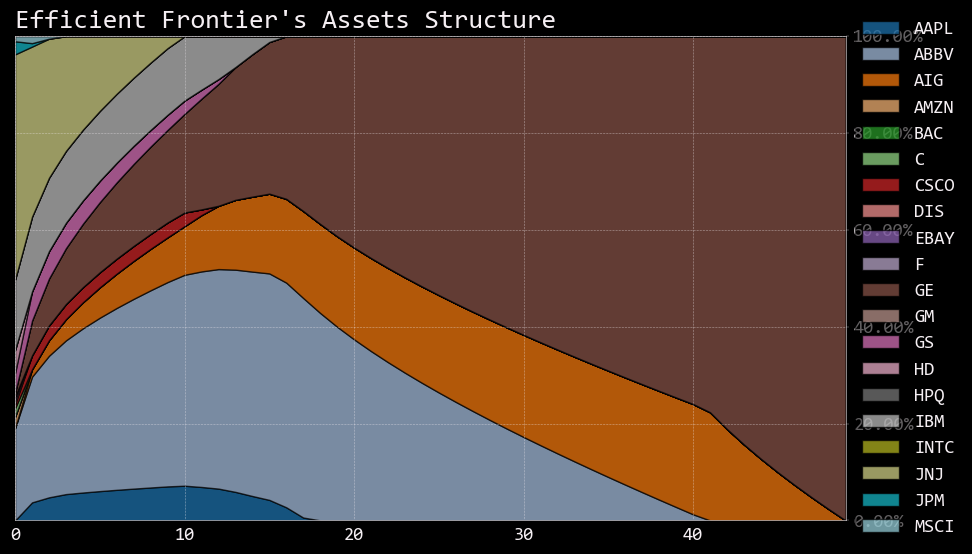

In [119]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [120]:
# Displaying factors statistics

display(loadings.min())
display(loadings.max())
display(X.corr())

const     -0.0811%
MTUM     -28.3271%
QUAL     -99.7644%
SIZE    -123.4774%
USMV    -116.1912%
VLUE    -140.9869%
dtype: float64

const     0.0884%
MTUM     31.0592%
QUAL    220.8298%
SIZE    151.3666%
USMV    138.8170%
VLUE    185.9938%
dtype: float64

,MTUM,QUAL,SIZE,USMV,VLUE
MTUM,100.0000%,80.2489%,77.9250%,73.2806%,70.8265%
QUAL,80.2489%,100.0000%,94.3274%,90.1110%,86.2741%
SIZE,77.9250%,94.3274%,100.0000%,87.8178%,92.4672%
USMV,73.2806%,90.1110%,87.8178%,100.0000%,80.9539%
VLUE,70.8265%,86.2741%,92.4672%,80.9539%,100.0000%


In [121]:
# Creating risk factors constraints

constraints = {'Disabled': [False, False, False, False, False],
               'Factor': ['MTUM', 'QUAL', 'SIZE', 'USMV', 'VLUE'],
               'Sign': ['<=', '<=', '<=', '>=', '<='],
               'Value': [0.8, 0.8, 0.4, 0.8 , 0.9],
               'Relative Factor': ['', 'USMV', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Factor,Sign,Value,Relative Factor
0,False,MTUM,<=,80.0000%,
1,False,QUAL,<=,80.0000%,USMV
2,False,SIZE,<=,40.0000%,
3,False,USMV,>=,80.0000%,
4,False,VLUE,<=,90.0000%,


In [122]:
C, D = rp.factors_constraints(constraints, loadings)
print (C,D)

[[-0.31059218 -0.         -0.         -0.          0.12166771  0.14321432
  -0.          0.28327098 -0.         -0.         -0.         -0.
  -0.          0.10866649 -0.          0.19761209 -0.19146179  0.14152017
  -0.         -0.2312694 ]
 [-1.62334171  1.57165262  0.99764383 -3.27650892  0.25458813 -0.17458893
   0.1217185  -0.93469389 -0.         -1.0522157  -0.60661883 -1.16191197
  -0.07998331 -0.15659072 -1.37714891  0.60887704 -2.29361388  1.38817023
   0.28682617 -0.86612478]
 [ 0.59476062  0.788652   -0.6064513  -0.82728484 -0.70116242 -0.68357
   1.03710476 -1.00453664 -1.08897731 -0.41673397 -0.33264607 -0.57068964
  -0.60128616 -0.          0.38744051  0.74778658  1.23477368  0.78544805
  -0.         -1.51366598]
 [ 0.          1.28996218  0.         -1.06821056 -0.3394275  -0.62735927
   0.73331154 -0.47925508  0.         -1.0522157  -0.60661883 -1.16191197
  -0.36799338  0.49287291 -0.5519678   0.60887704 -0.81549057  1.38817023
   0.          0.        ]
 [ 0.21178533 -

In [123]:
port.ainequality = C
port.binequality = D

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,ABBV,AIG,AMZN,BAC,C,CSCO,DIS,EBAY,F,GE,GM,GS,HD,HPQ,IBM,INTC,JNJ,JPM,MSCI
weights,0.0000%,19.0467%,0.0000%,2.3104%,0.0000%,1.8092%,0.8017%,0.7970%,0.8127%,0.0000%,0.7427%,0.0000%,4.0722%,4.7752%,0.0000%,14.5536%,0.0000%,46.5264%,2.7053%,1.0470%


In [124]:
#To check if the constraints are verified, I will make a regression among the portfolio returns and risk factors:

In [125]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
y = np.matrix(returns) * np.matrix(w)
results = sm.OLS(y, X1).fit()
coefs = results.params

print(coefs)

const     0.0192%
MTUM    -10.2220%
QUAL      1.8302%
SIZE    -54.1657%
USMV     95.0250%
VLUE     50.8607%
dtype: float64


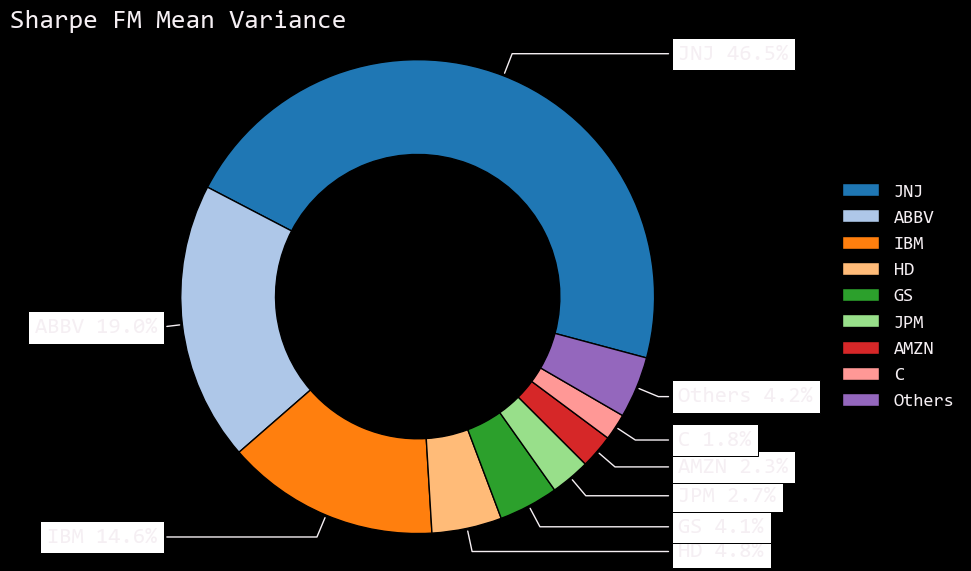

In [126]:
ax = rp.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                height=6, width=10, ax=None)

In [127]:
points = 50 # Number of points of the frontier
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
display(frontier.T.head())

,AAPL,ABBV,AIG,AMZN,BAC,C,CSCO,DIS,EBAY,F,GE,GM,GS,HD,HPQ,IBM,INTC,JNJ,JPM,MSCI
0,0.0000%,19.0467%,0.0000%,2.3104%,0.0000%,1.8092%,0.8017%,0.7970%,0.8127%,0.0000%,0.7427%,0.0000%,4.0722%,4.7752%,0.0000%,14.5536%,0.0000%,46.5264%,2.7053%,1.0470%
1,2.2443%,22.5768%,0.0001%,0.2483%,0.0000%,0.0000%,2.2553%,0.0000%,0.0000%,0.0000%,4.4694%,0.0000%,5.8612%,1.9152%,0.0000%,15.3597%,0.0000%,40.8620%,2.3218%,1.8860%
2,3.1445%,24.2852%,0.5940%,0.0000%,0.0000%,0.0000%,2.6898%,0.0000%,0.0000%,0.0000%,5.8694%,0.0000%,6.0634%,0.1975%,0.0000%,15.4855%,0.0000%,38.2020%,1.6282%,1.8406%
3,3.6428%,25.7197%,1.3978%,0.0000%,0.0000%,0.0000%,2.8560%,0.0000%,0.0000%,0.0000%,6.9965%,0.0000%,6.0283%,0.0000%,0.0000%,15.4480%,0.0000%,35.5696%,0.8451%,1.4963%
4,4.0349%,26.9093%,2.0651%,0.0000%,0.0000%,0.0000%,2.9737%,0.0000%,0.0000%,0.0000%,7.9372%,0.0000%,5.9924%,0.0000%,0.0000%,15.4065%,0.0000%,33.3321%,0.1700%,1.1789%


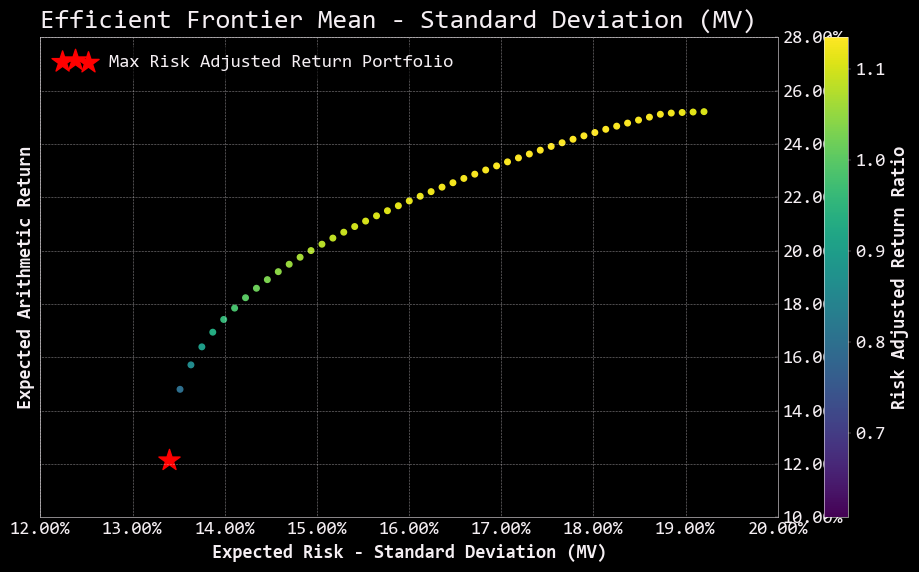

In [128]:
# Plotting efficient frontier composition

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                    rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                    marker='*', s=16, c='r', height=6, width=10, ax=None)

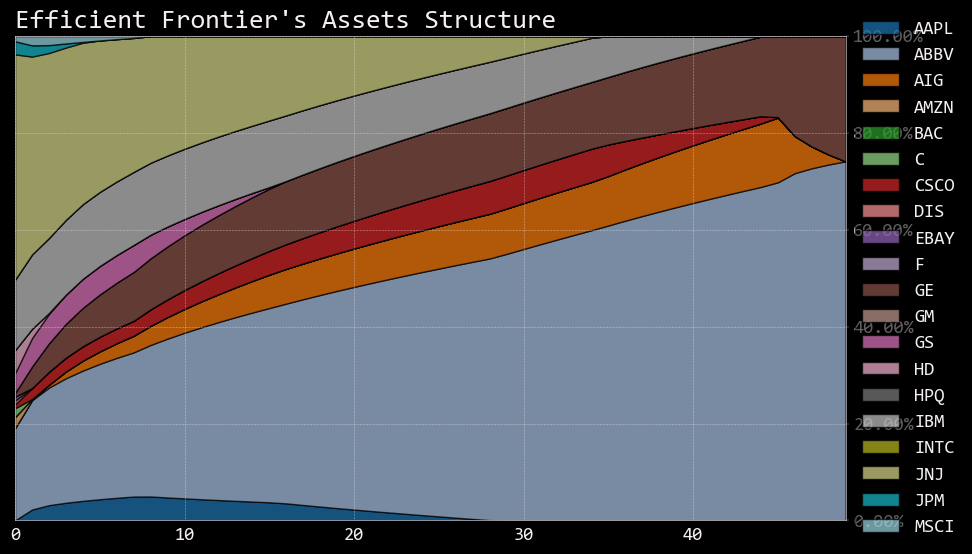

In [129]:
# Plotting efficient frontier composition
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [130]:
display(returns)

,AAPL,ABBV,AIG,AMZN,BAC,C,CSCO,DIS,EBAY,F,GE,GM,GS,HD,HPQ,IBM,INTC,JNJ,JPM,MSCI
2020-11-03,1.9231%,1.1654%,2.5452%,2.0259%,2.2680%,2.1359%,1.6922%,2.1666%,2.3504%,2.7985%,2.1722%,2.6032%,2.1586%,1.8364%,2.1491%,1.3038%,1.7745%,0.9614%,1.9797%,2.6395%
2020-11-04,5.0007%,0.4226%,-1.8121%,4.4928%,-1.7998%,-1.8872%,1.8174%,-0.1675%,0.5891%,-0.6692%,-0.2436%,-0.7979%,-0.5896%,1.6172%,1.3422%,-0.4779%,2.9640%,0.4787%,-0.5148%,3.8682%
2020-11-05,1.5607%,0.4264%,3.4906%,2.0551%,3.3337%,3.4620%,1.3615%,2.6437%,2.3858%,4.6084%,3.2917%,4.4395%,3.0255%,1.3272%,3.0679%,1.3473%,2.8992%,-0.0563%,2.6624%,1.8597%
2020-11-06,0.0140%,0.2957%,-0.9473%,-0.2134%,-1.0963%,-1.2965%,-0.1694%,-0.7090%,-0.2651%,-1.7056%,-1.0322%,-1.7596%,-0.8442%,0.0423%,-1.0608%,-0.3996%,-1.3142%,0.4230%,-0.8060%,0.5289%
2020-11-09,0.5381%,1.5497%,5.0236%,1.7810%,5.2576%,5.4551%,2.7079%,4.7501%,2.9699%,6.2258%,4.4471%,5.8909%,4.0698%,2.6320%,4.3842%,3.7225%,3.3196%,1.6376%,3.9986%,0.4459%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-26,-2.9480%,0.0192%,1.0726%,-3.1070%,0.6961%,0.5620%,-1.2934%,-0.5034%,-0.2807%,-0.2885%,-0.1640%,-0.3158%,0.1959%,-1.0942%,-1.4431%,-0.0922%,-2.6881%,-0.2198%,0.0772%,-1.6500%
2023-10-27,0.1776%,-1.1137%,-1.4242%,0.5281%,-1.1640%,-0.9424%,-0.7170%,-0.8387%,-1.1024%,-0.6358%,-0.5049%,-0.6215%,-0.8113%,-0.8305%,-0.2145%,-0.8956%,0.4293%,-1.1450%,-0.9137%,-0.6332%
2023-10-30,1.8197%,0.8049%,0.3514%,1.5544%,0.2547%,0.1654%,1.2978%,0.6396%,0.7629%,0.6193%,0.5986%,0.4502%,0.4745%,1.1575%,1.0867%,0.6605%,1.3175%,0.8261%,0.5622%,1.4884%
2023-10-31,0.1316%,0.7829%,1.7883%,-0.1816%,1.4824%,1.3938%,0.7166%,0.8439%,0.9531%,1.5885%,1.2234%,1.4264%,1.2444%,0.5848%,0.9042%,0.9038%,0.4751%,0.5451%,1.2296%,0.4209%


In [131]:
#Estimating Portfolios Using Risk Factors with Other Risk Measures
# find the portfolios that maximize the risk adjusted return for all available risk measures.

In [132]:
#Calculate Optimal Portfolios for Several Risk Measures.will mantain the constraints on risk factors.

In [133]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

# port.reset_linear_constraints() # To reset linear constraints (factor constraints)

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = False
for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=False)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [134]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
AAPL,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ABBV,19.05%,0.00%,0.00%,74.17%,91.03%,55.34%,1.09%,0.00%,100.00%,89.27%,100.00%,92.83%,99.96%
AIG,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.02%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
AMZN,2.31%,0.92%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,3.68%,0.00%,0.34%,0.00%
BAC,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.03%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
C,1.81%,9.17%,6.54%,0.00%,0.00%,0.00%,0.36%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CSCO,0.80%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DIS,0.80%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
EBAY,0.81%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
F,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

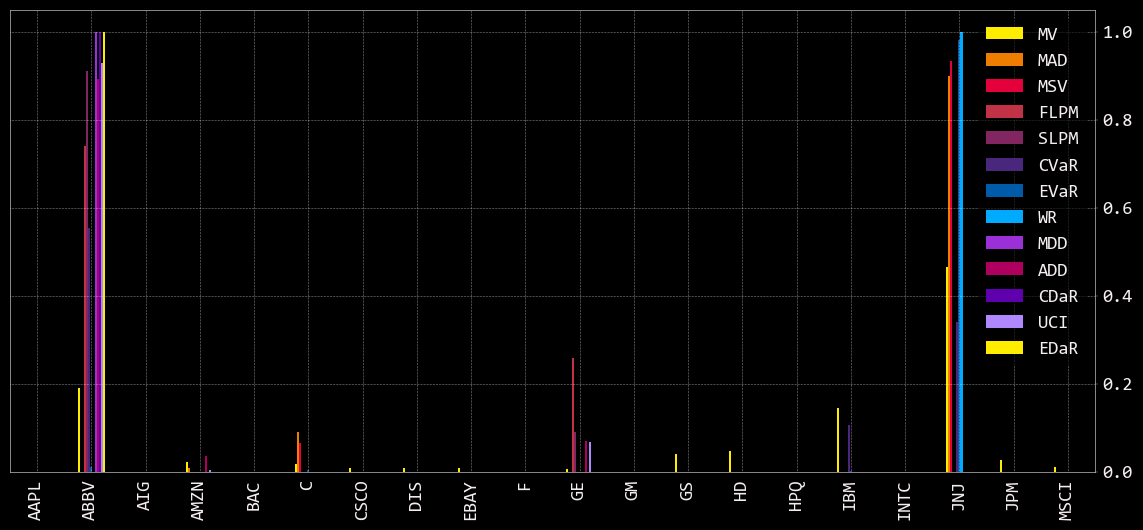

In [135]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [136]:
w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = True
for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [137]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')


,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
AAPL,2.09%,2.21%,0.99%,0.00%,8.26%,0.00%,0.00%,0.00%,4.18%,5.69%,11.00%,12.67%,12.33%
ABBV,16.83%,15.86%,13.89%,73.37%,29.50%,14.14%,11.52%,12.51%,18.23%,23.38%,22.58%,25.98%,21.27%
AIG,0.00%,0.00%,0.00%,2.48%,0.85%,0.00%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
AMZN,2.26%,3.34%,0.20%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAC,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
C,0.00%,2.06%,1.48%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CSCO,4.48%,2.07%,5.20%,0.00%,7.54%,8.12%,0.01%,0.00%,0.00%,5.27%,0.00%,0.00%,0.00%
DIS,2.09%,0.98%,2.54%,0.00%,0.00%,1.67%,0.03%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
EBAY,0.73%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
F,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

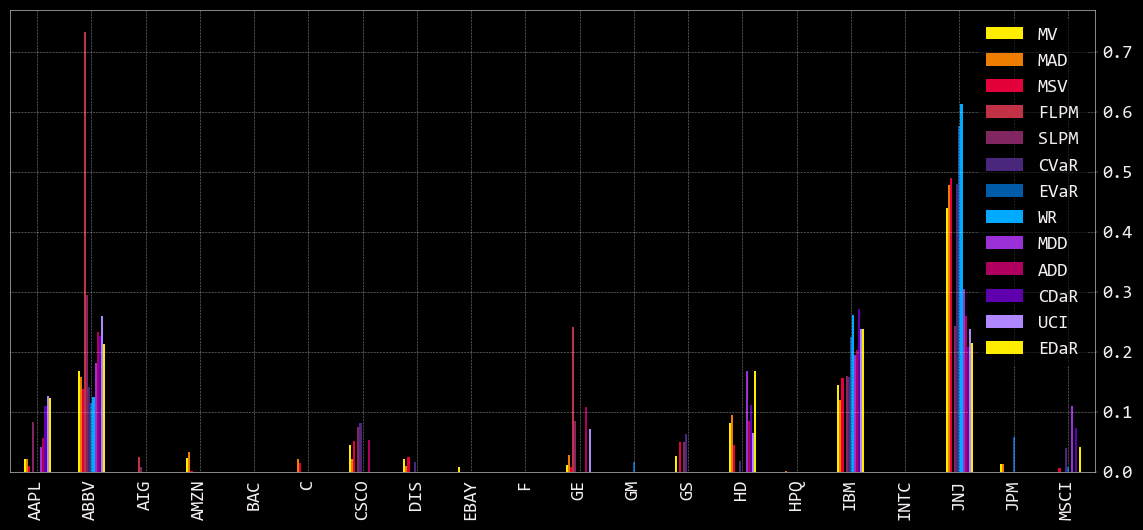

In [138]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)